In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\\SQLDATA\\Dataset\\IBM_HR_Analytics_LCD.csv")

# 1. Kiểm tra dữ liệu

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# 2. Xử lý dữ liệu

In [14]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [ ]:
cat_cols = ['Department', 'JobRole', 'Gender', 'Education', 'OverTime', 'MaritalStatus',
            'BusinessTravel', 'EducationField', 'WorkLifeBalance']
for col in cat_cols:
    df[col] = df[col].astype('category')

In [ ]:
df.info()

# Tỷ lệ nhân viên nghỉ việc

In [ ]:
attrition_rate = df['Attrition'].mean()*100
print(f"Tỷ lệ nghỉ việc :{attrition_rate:.2f}%")

# PHÂN TÍCH TỶ LỆ NGHỈ VIỆC THEO BIẾN

In [8]:
pd.crosstab(df['Department'], df['Attrition'], normalize='index') * 100

Attrition,No,Yes
Department,,
Human Resources,80.952381,19.047619
Research & Development,86.160250,13.839750
Sales,79.372197,20.627803


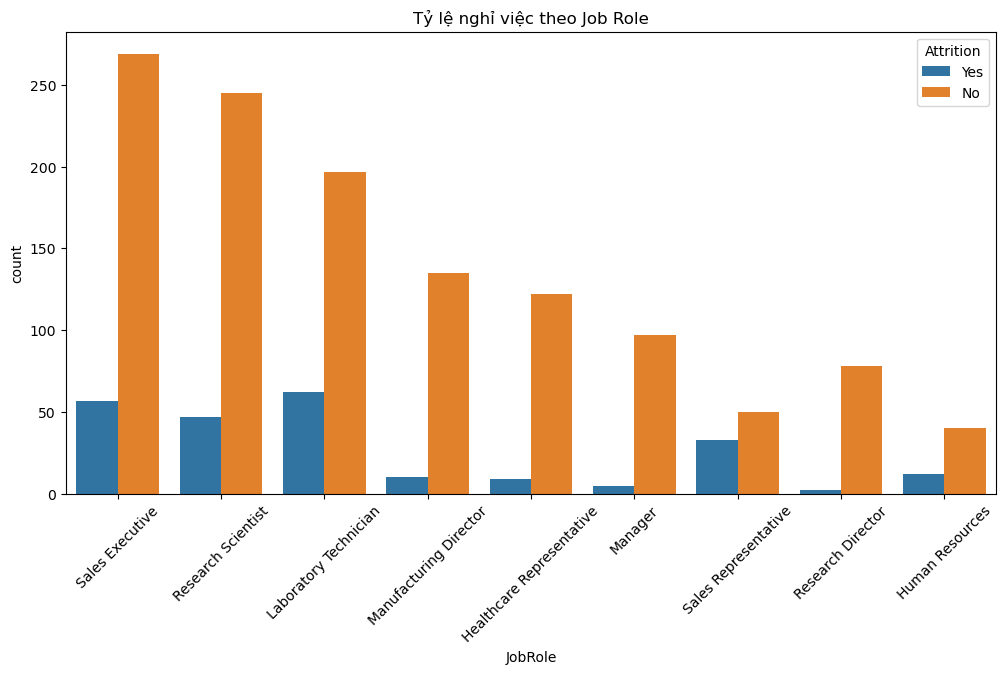

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='JobRole', hue='Attrition')
plt.xticks(rotation=45)
plt.title('Tỷ lệ nghỉ việc theo Job Role')
plt.show()

# PHÂN TÍCH YẾU TỐ ẢNH HƯỞNG NGHỈ VIỆC

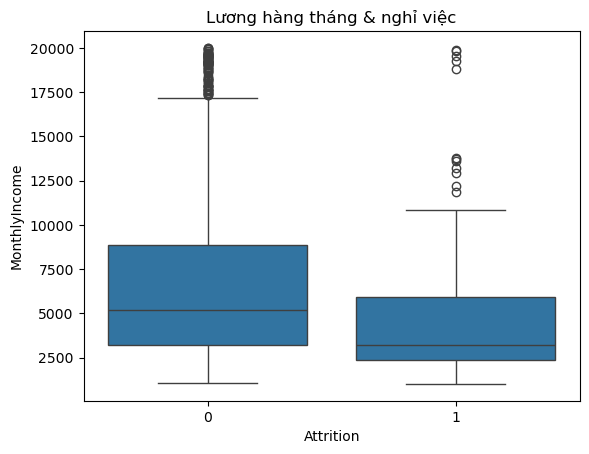

In [15]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Lương hàng tháng & nghỉ việc');

In [11]:
pd.crosstab(df['OverTime'], df['Attrition'], normalize='index') * 100

Attrition,No,Yes
OverTime,,
No,89.563567,10.436433
Yes,69.471154,30.528846


# PHÂN TÍCH TƯƠNG QUAN

Text(0.5, 1.0, 'Ma trận tương quan giữa các biến số')

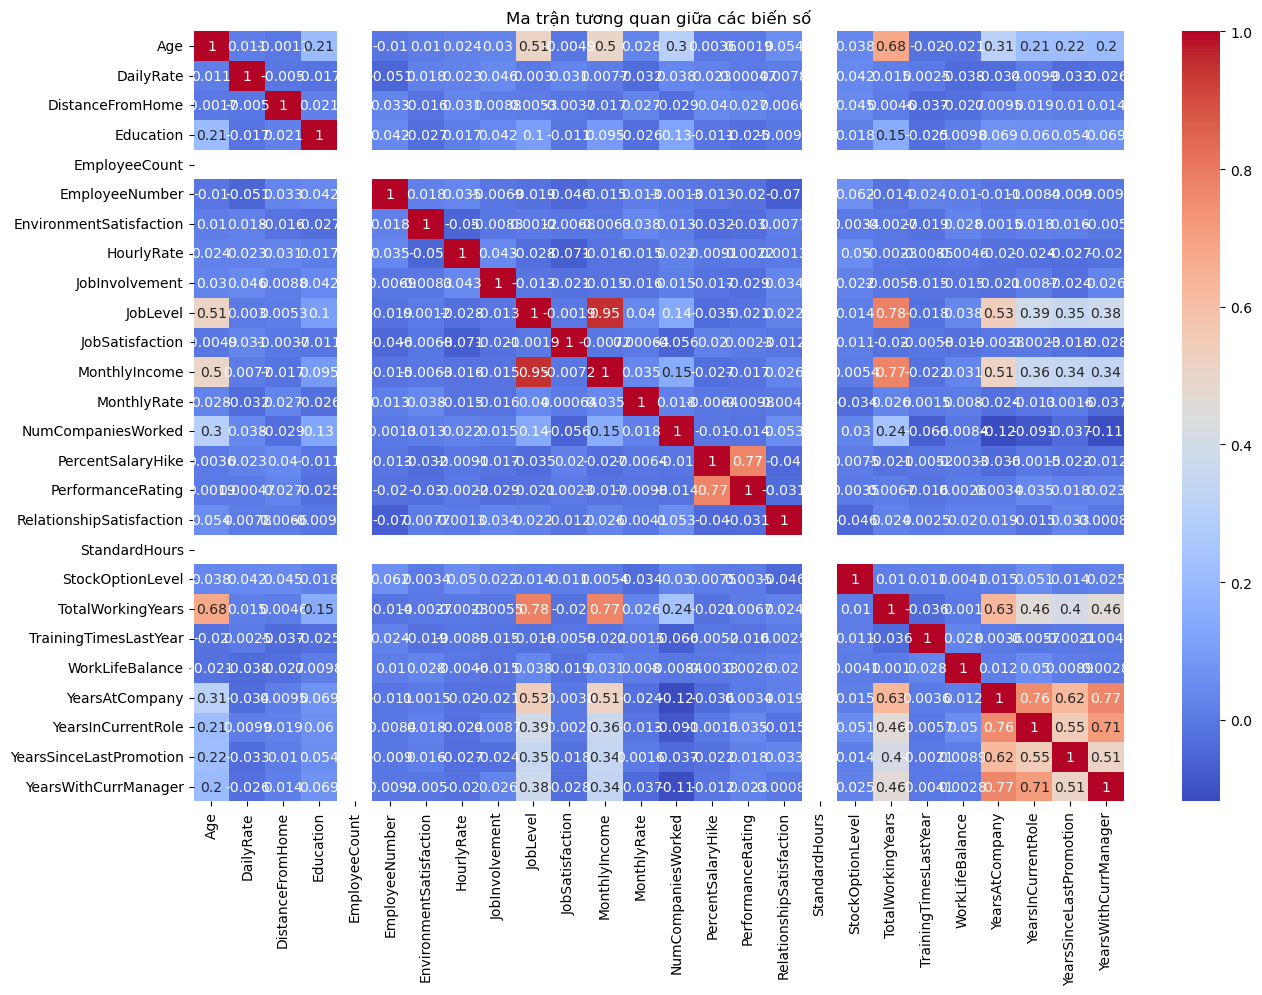

In [12]:
correlation = df.corr(numeric_only=True)
plt.figure(figsize=(15,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan giữa các biến số')

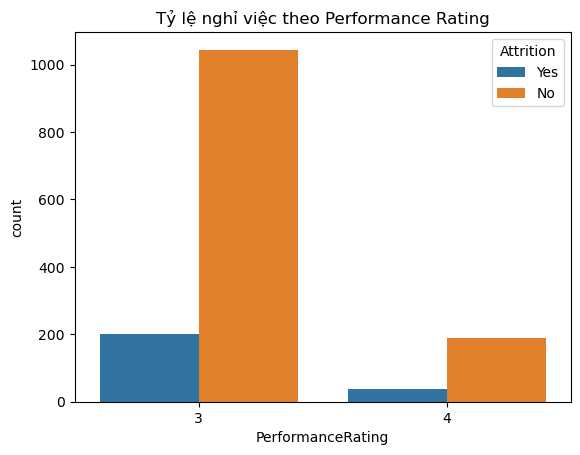

In [13]:
# Giả định: PerformanceRating = 4 (tốt), 3 (trung bình)
pd.crosstab(df['PerformanceRating'], df['Attrition'], normalize='index') * 100

sns.countplot(x='PerformanceRating', hue='Attrition', data=df)
plt.title("Tỷ lệ nghỉ việc theo Performance Rating");

In [14]:
# Nhân viên nghỉ việc nhưng ở JobLevel cao hoặc Performance tốt
df_risk = df[(df['Attrition'] == 1) & ((df['JobLevel'] >= 3) | (df['PerformanceRating'] >= 4))]
df_risk[['Age', 'JobLevel', 'MonthlyIncome', 'OverTime', 'DistanceFromHome']].describe()

,Age,JobLevel,MonthlyIncome,DistanceFromHome
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN
